In [155]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.stats as st
import sys
sys.path.append("..") 
import importlib
import functions.calc_mcf as calc_mcf
import functions.calc_projection as cp
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

importlib.reload(calc_mcf)
importlib.reload(cp)


dpi = 400

plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
plt.style.use(['science','ieee'])
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams["text.usetex"] = False

In [156]:
files = ['../h5_max_contour/g1040_0016_binary_search.h5', '../h5_max_contour/g1041_9015_by_mass.h5']

def readData(file):
    with h5py.File(file, 'r') as data:
        myData = {key: data[key][()] for key in data.keys()}
    return myData

In [157]:
data = readData(files[0])

In [159]:
projected = cp.projection(data['density'], data['bx'], data['by'], data['bz'], data['x'], data['y'], data['z'], (0, 0, 1))

In [160]:
binned_den = projected[-1]

In [161]:
np.max(binned_den)

105.15072519984838

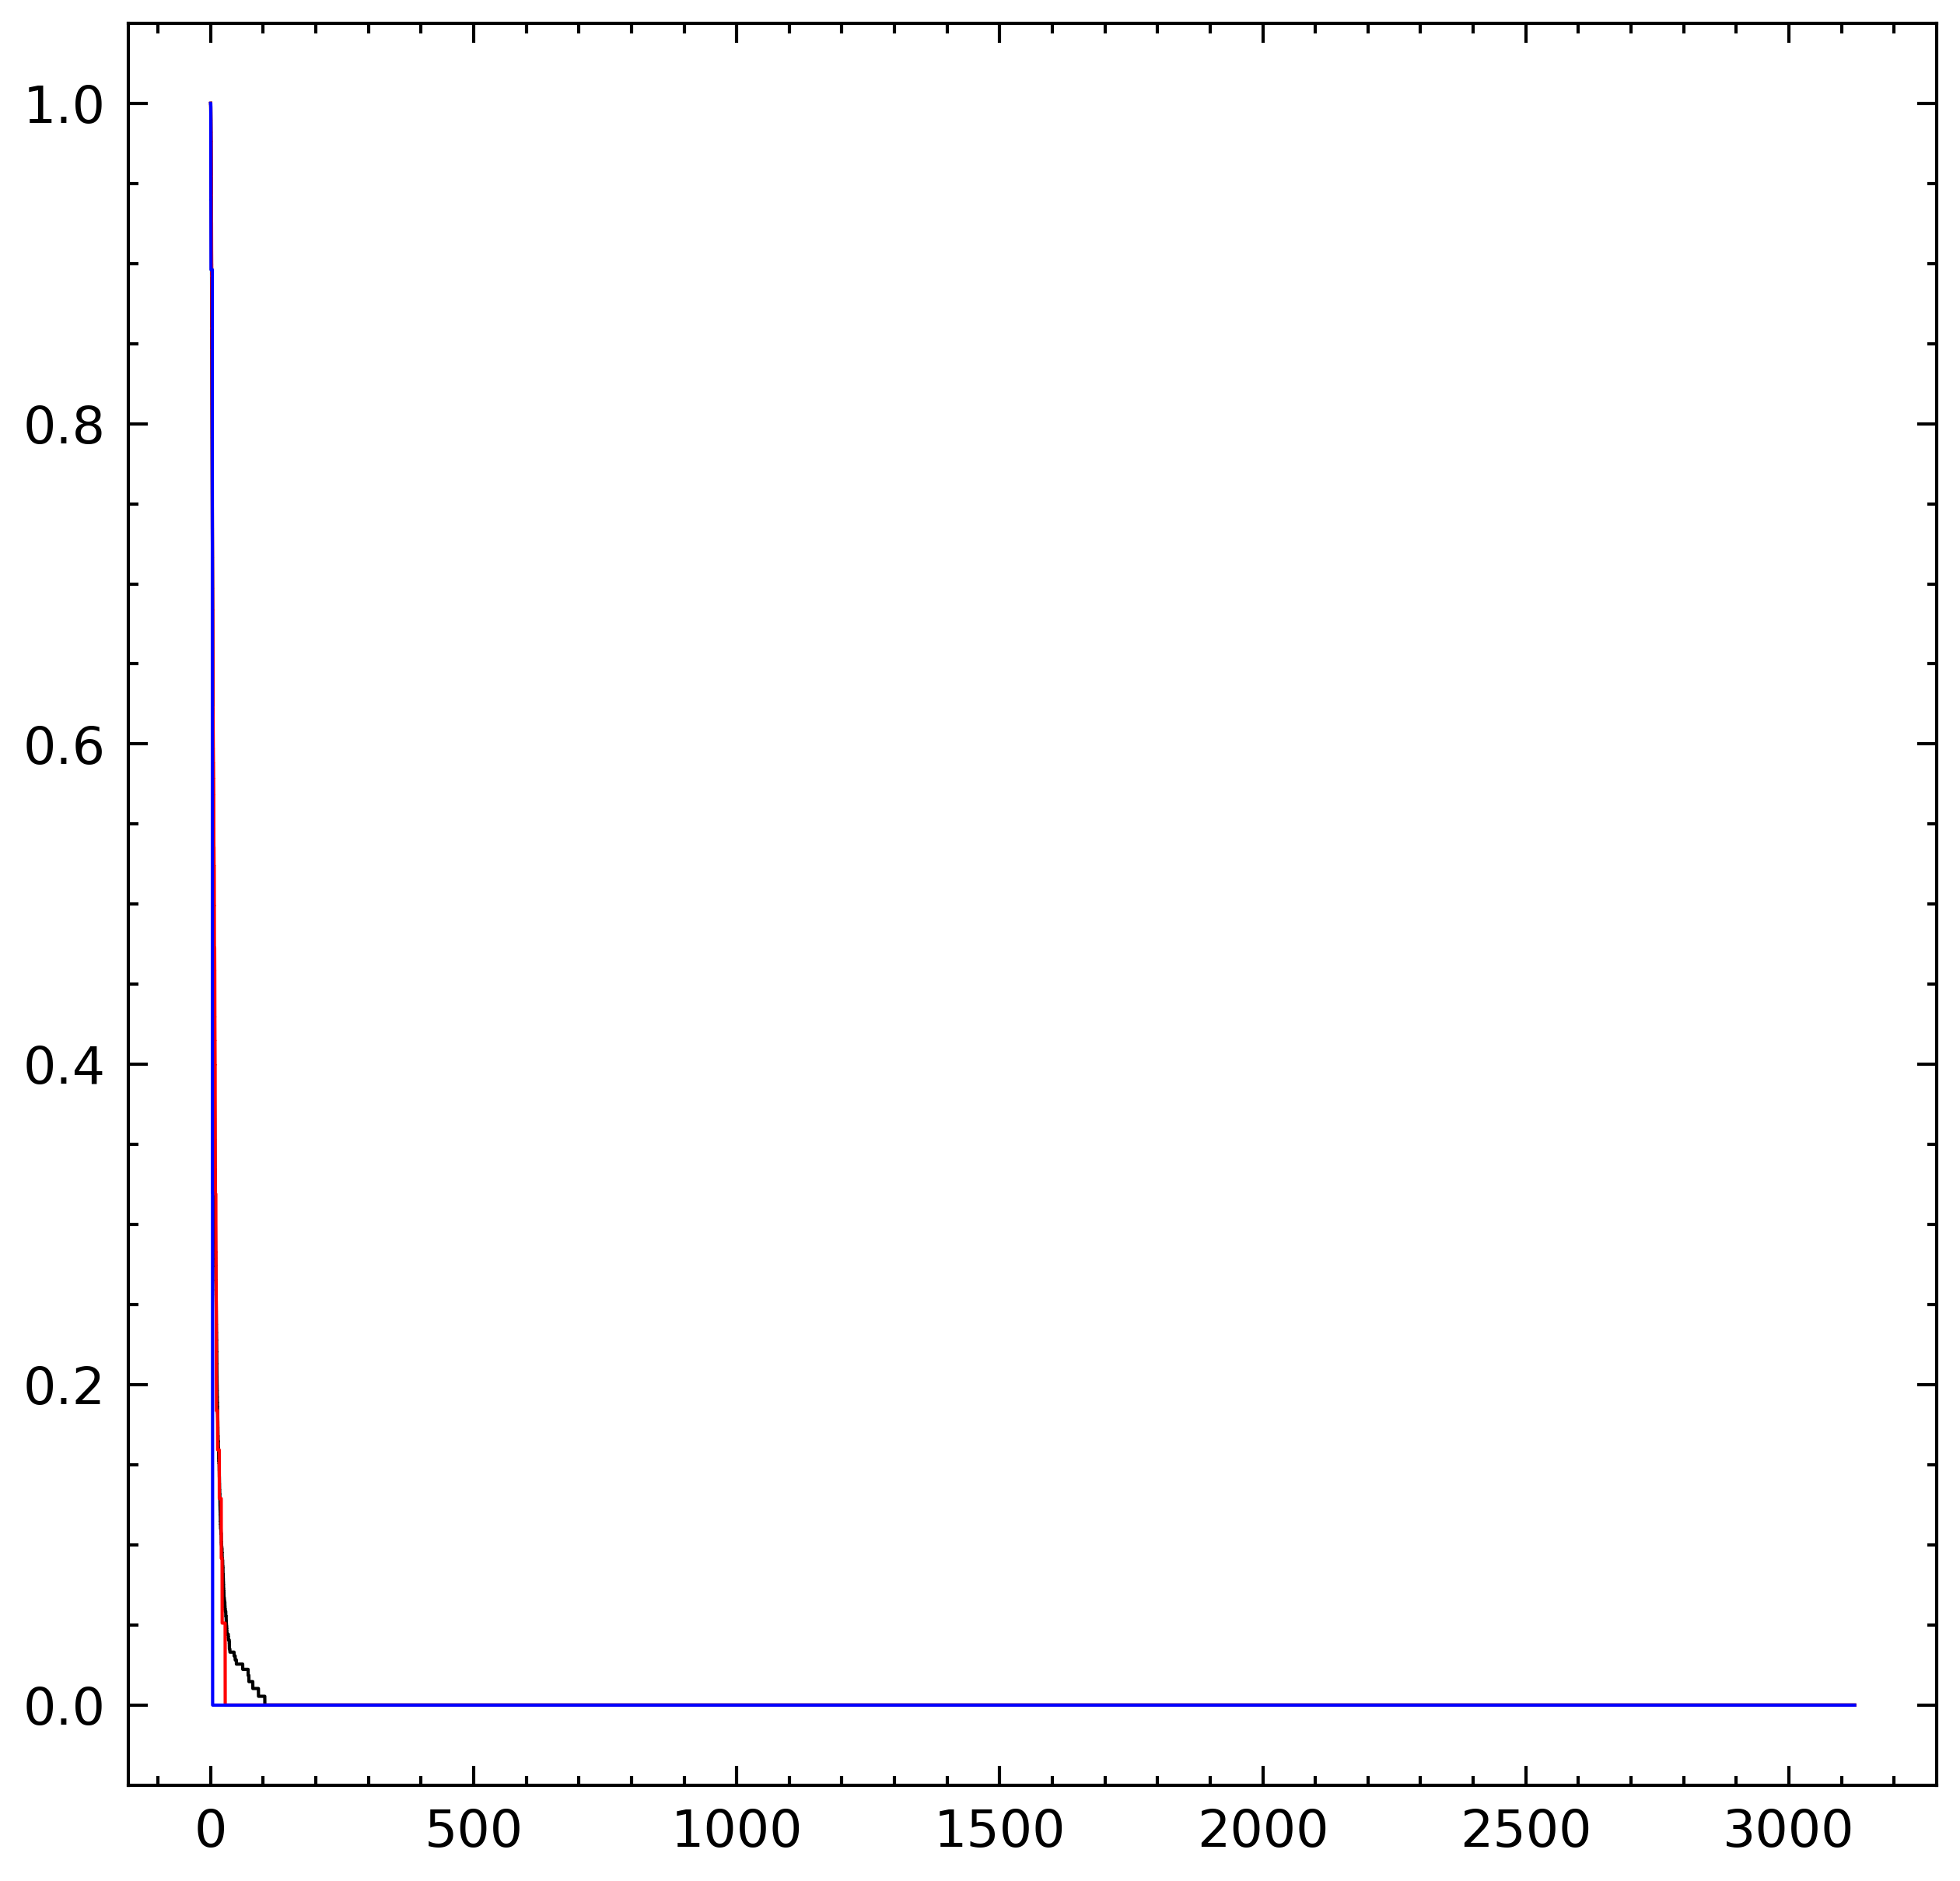

In [162]:

reduce_two_data = cp.reduce_size(binned_den, 2)

dx = 10/480

n_bins = int(10e5)+1



for i in range(3):
    
    # plot_data = reduce_two_data.copy()
    # plot_data[plot_data == 0] = np.nan
    
    bins = np.linspace(0, 150000, n_bins) * dx
    
    n_bins  = int(n_bins/2)
    
    idx = np.where(reduce_two_data > 0)
    
    mcf, mcf_bins = calc_mcf.calc_mcf(reduce_two_data[idx], bins, 0)
    
    plt.plot(mcf_bins, mcf, ls = 'solid', lw = 0.5)

    reduce_two_data = cp.reduce_size(reduce_two_data, 6)
    # plt.show()

plt.show()

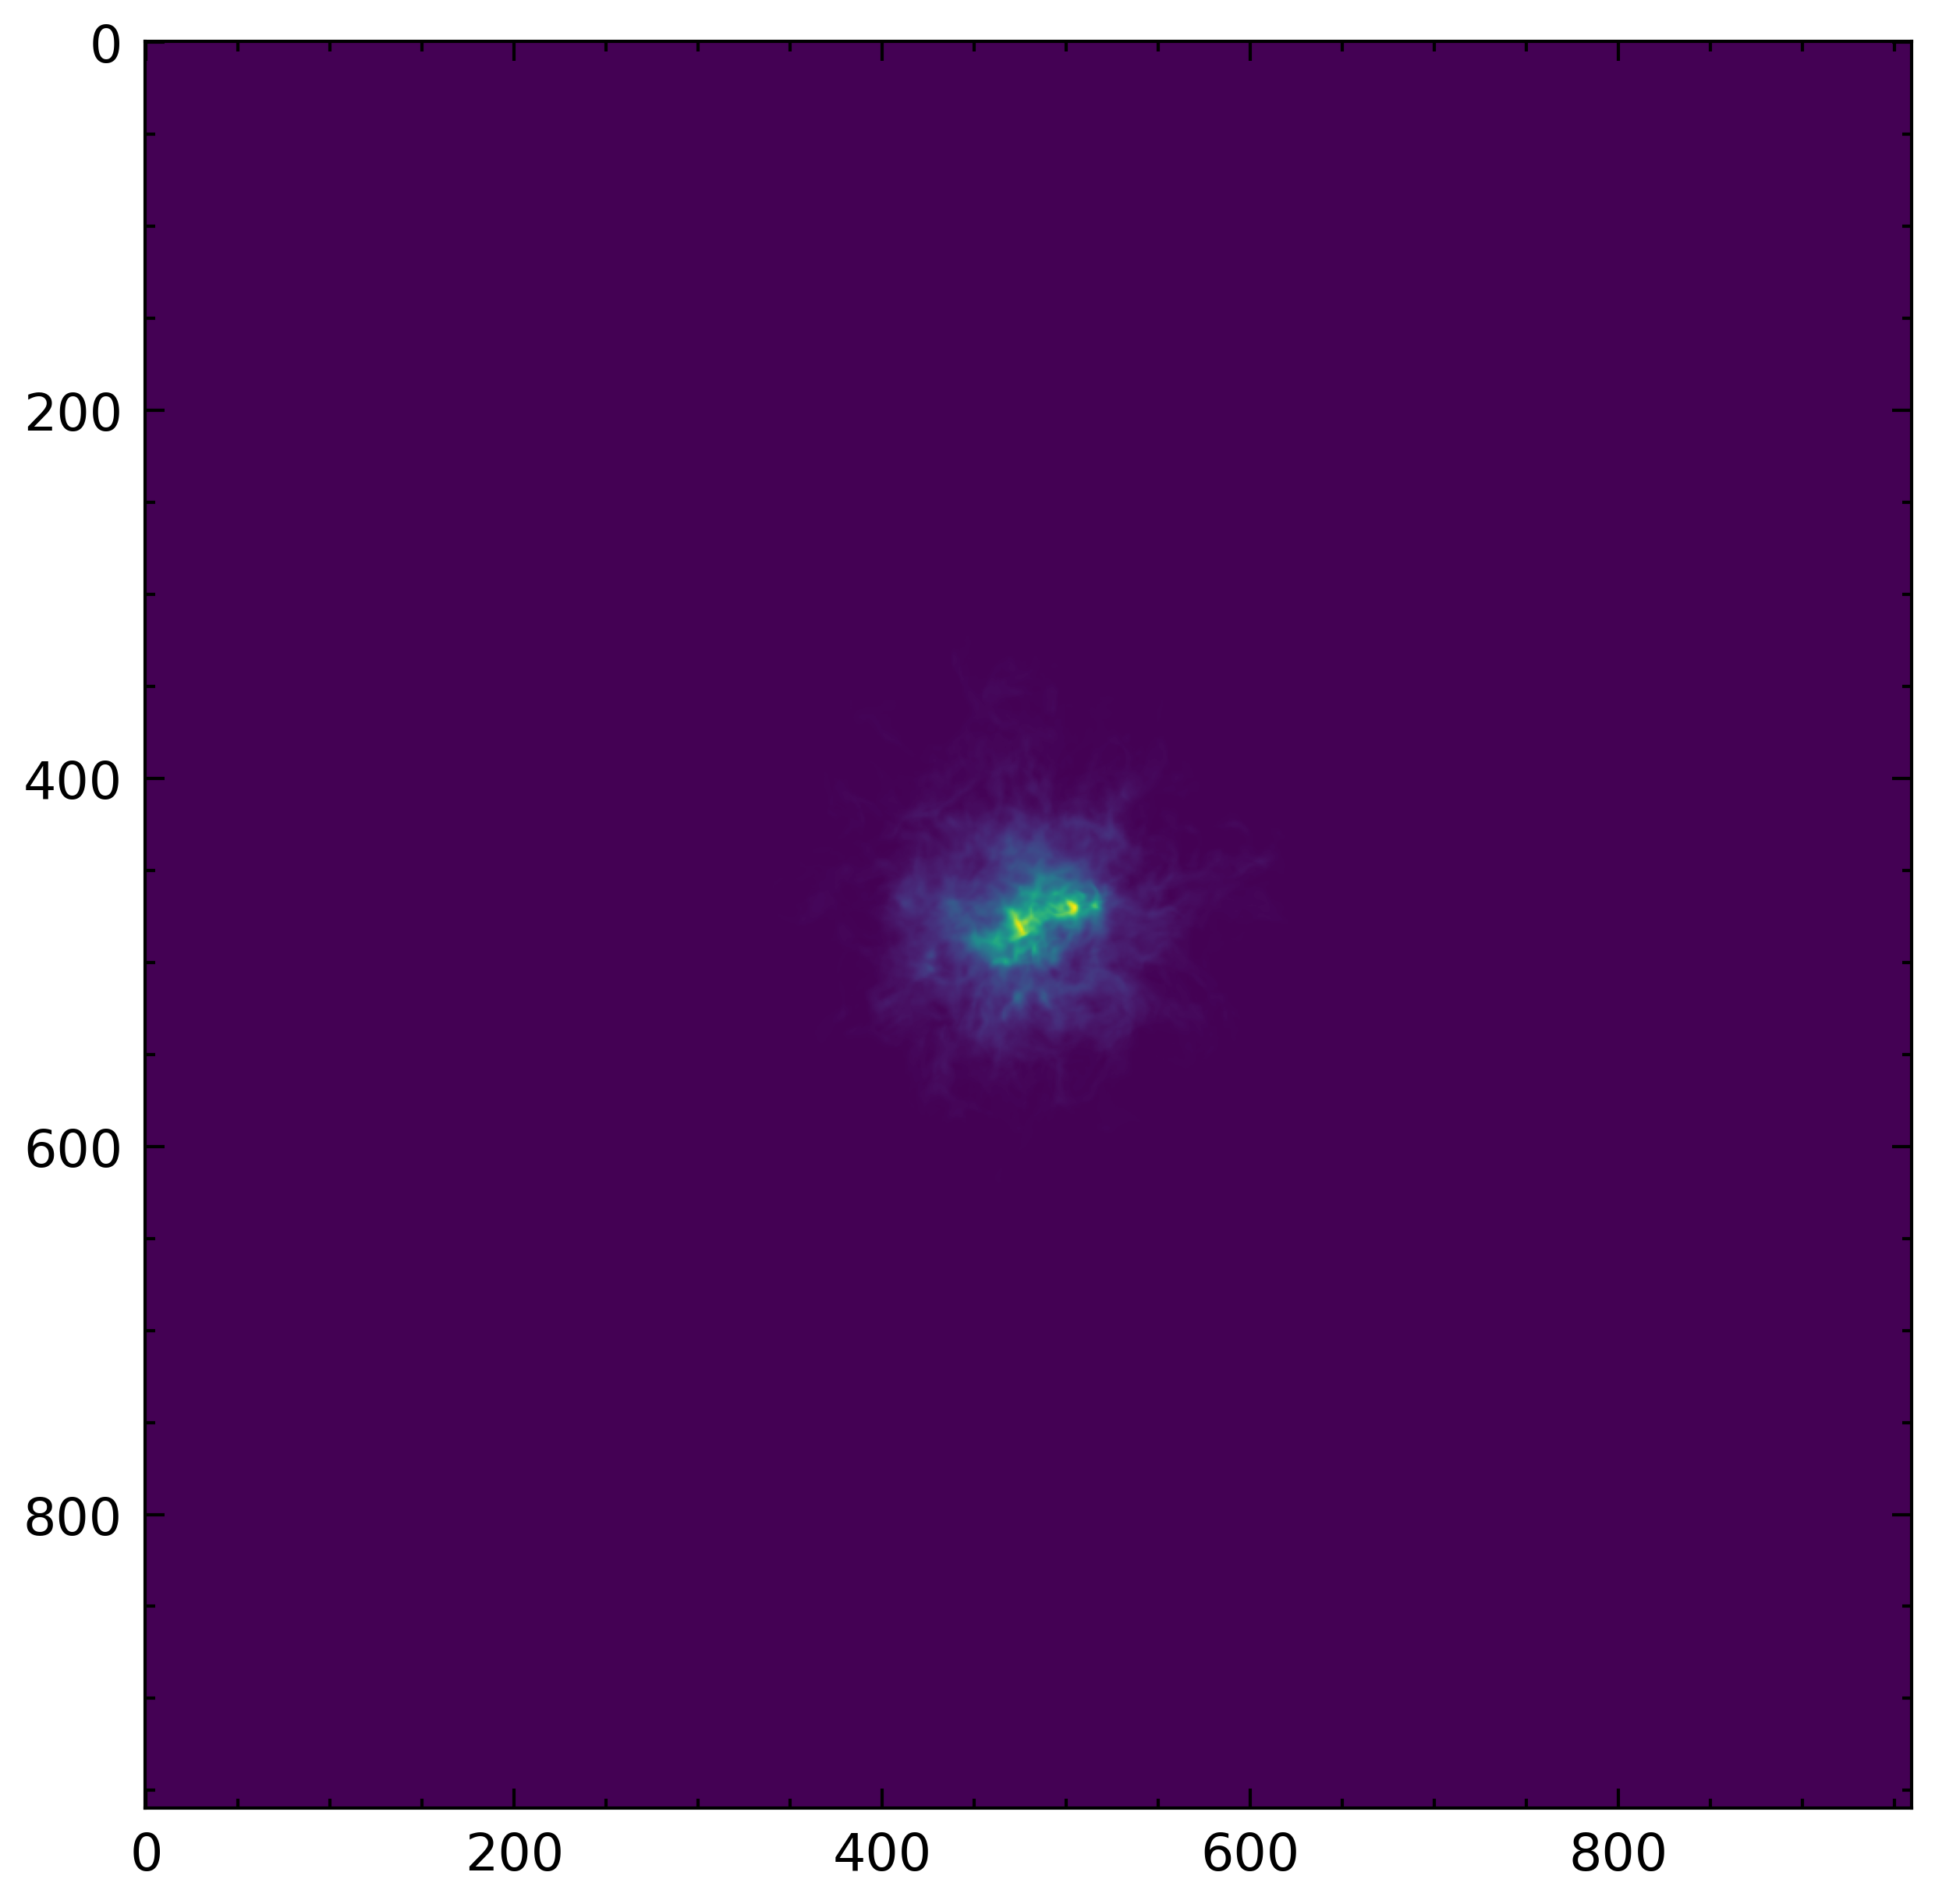

In [135]:
plt.imshow(binned_den)